In [232]:
import pandas as pd
import numpy as np
import re

In [233]:
df = pd.read_csv('Mobile phone price.csv')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [234]:
df.isna().sum() #Detect missing values

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [235]:
#Removing extra spaces in column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ","")
df.rename(columns={'Price($)': 'Price',
                     'ScreenSize(inches)': 'ScreenSize',
                     'Camera(MP)': 'Camera',
                     'BatteryCapacity(mAh)': 'BetteryCapacity',
                     'Price($)': 'Price'}, inplace=True)
print(df.columns)

Index(['Brand', 'Model', 'Storage', 'RAM', 'ScreenSize', 'Camera',
       'BetteryCapacity', 'Price'],
      dtype='object')


In [236]:
df['Brand'].value_counts()

Brand
Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: count, dtype: int64

In [237]:
df['Model'].value_counts()

Model
Poco X3 Pro           6
Y33s                  5
iPhone XR             5
C21Y                  5
Redmi 10 Prime        5
                     ..
Mi 11 Lite NE         1
Moto G Stylus 2021    1
A54s 5G               1
Galaxy M52            1
Reno3                 1
Name: count, Length: 239, dtype: int64

In [238]:
df.drop('Model', axis=1, inplace=True)

In [239]:
#RAM, Storage, Price, ScreenSize to numeric dtype
df["Storage"] = [int(re.findall(r'\d+', value)[0]) for value in df["Storage"].values]
df["RAM"] = [int(re.findall(r'\d+', value)[0]) for value in df["RAM"].values]
df["Price"] = [int(re.findall(r'\d+,*\d*', value)[0].replace(',', '')) for value in df["Price"].values]
df["ScreenSize"] = [float(re.findall(r'\d+\.*\d*', value)[0]) for value in df["ScreenSize"].values]

In [240]:
df.head()

,Brand,Storage,RAM,ScreenSize,Camera,BetteryCapacity,Price
0,Apple,128,6,6.10,12 + 12 + 12,3095,999
1,Samsung,256,12,6.80,108 + 10 + 10 + 12,5000,1199
2,OnePlus,128,8,6.70,48 + 50 + 8 + 2,4500,899
3,Xiaomi,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,128,8,6.40,50 + 12.2,4614,799


In [241]:
df['Camera'].value_counts()

Camera
13MP + 2MP + 2MP          29
48MP + 8MP + 2MP + 2MP    16
48+8+2+2                  13
13MP + 2MP                11
64MP + 8MP + 2MP          11
                          ..
13MP + 5MP + 2MP + 2MP     1
8MP                        1
48MP + 8MP + 5MP + 2MP     1
13MP                       1
48+13+8+2                  1
Name: count, Length: 143, dtype: int64

In [242]:
df['Camera'] = df['Camera'].str.replace('MP', '')

In [243]:
def convert(unconverted):
    converted = re.findall(r'\d+\.*\d*', str(unconverted))
    return float(converted[0]) if converted else 0 

In [244]:
cameras = df['Camera'].str.split('+')
cameras = [[convert(el) for el in row] for row in cameras]
for i, row in enumerate(cameras):
    for _ in range(4 - len(row)):
        cameras[i].append(0)

In [245]:
cameras = np.asarray(cameras)
camera_df = pd.DataFrame({'Camera1': cameras[:, 0], 'Camera2': cameras[:, 1], 'Camera3': cameras[:, 2], 'Camera4': cameras[:, 3]})
df = pd.concat([df.reset_index(drop=True), camera_df.reset_index(drop=True)], axis=1)
#Dropping old camera column
df.drop('Camera', axis=1, inplace=True)
df.head()

,Brand,Storage,RAM,ScreenSize,BetteryCapacity,Price,Camera1,Camera2,Camera3,Camera4
0,Apple,128,6,6.10,3095,999,12.0,12.0,12.0,0.0
1,Samsung,256,12,6.80,5000,1199,108.0,10.0,10.0,12.0
2,OnePlus,128,8,6.70,4500,899,48.0,50.0,8.0,2.0
3,Xiaomi,128,6,6.67,5020,279,64.0,8.0,5.0,2.0
4,Google,128,8,6.40,4614,799,50.0,12.2,0.0,0.0


C:\Users\Надя\AppData\Local\Temp\ipykernel_19144\3261677340.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Brand', y='Price', data=df[df['Brand'].isin(company_list)], palette='Spectral', errorbar=('ci', False),)


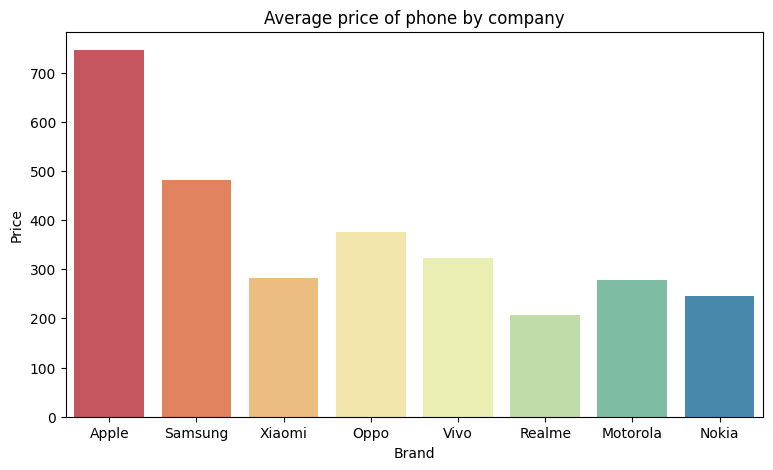

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

company_list = df['Brand'].value_counts().index[:8].tolist()

plt.figure(figsize=(9,5))
ax=sns.barplot(x='Brand', y='Price', data=df[df['Brand'].isin(company_list)], palette='Spectral', errorbar=('ci', False),)
plt.title('Average price of phone by company')
plt.show()

C:\Users\Надя\AppData\Local\Temp\ipykernel_19144\3897753882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Storage', y='Price', data=df[df['Storage'].isin(cpu_list)], palette='Spectral', errorbar=('ci', False),)


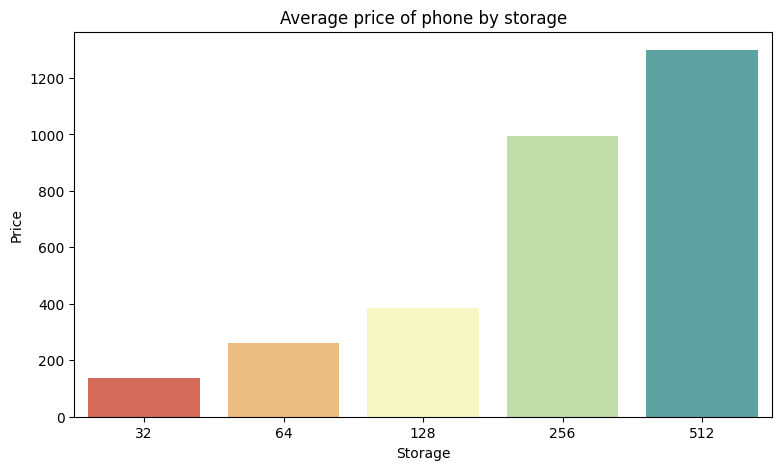

In [247]:
cpu_list = df['Storage'].value_counts().index[:8].tolist()

plt.figure(figsize=(9,5))
ax=sns.barplot(x='Storage', y='Price', data=df[df['Storage'].isin(cpu_list)], palette='Spectral', errorbar=('ci', False),)
plt.title('Average price of phone by storage')
plt.show()

<Axes: xlabel='Camera4'>

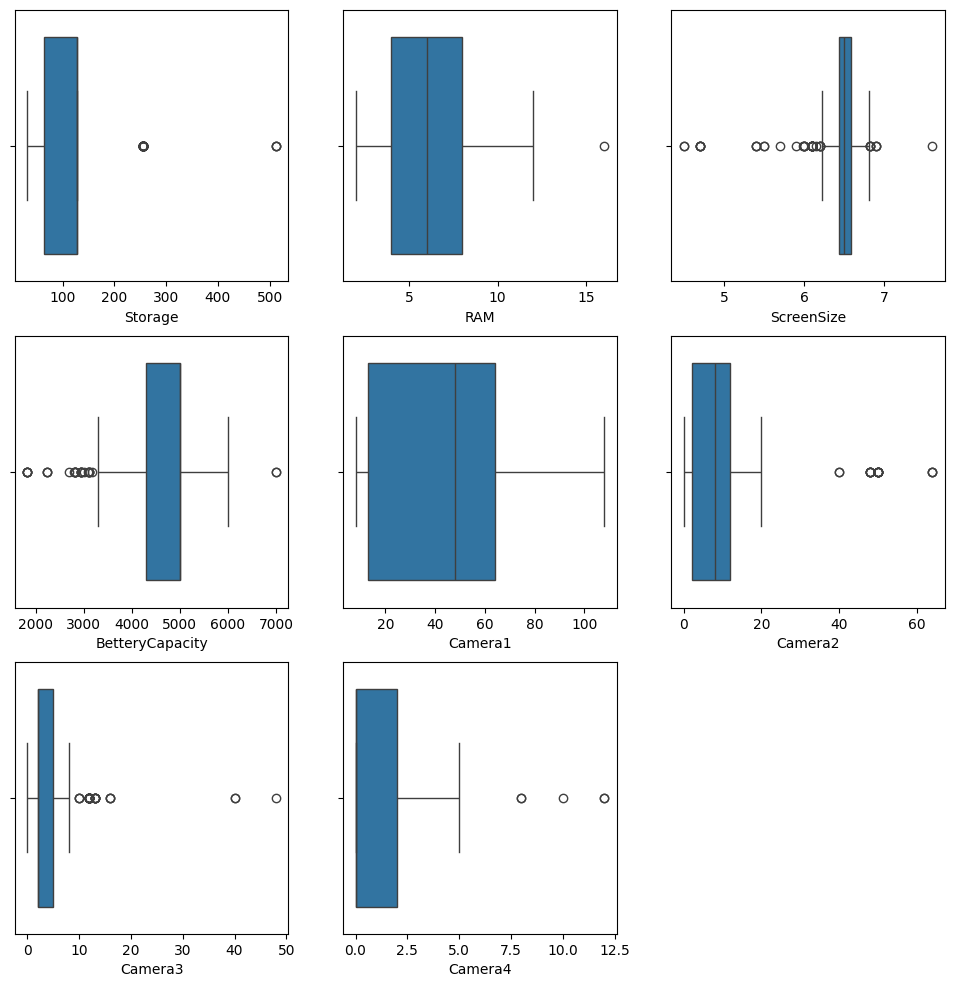

In [248]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.boxplot(data=df, x='Storage')

plt.subplot(3, 3, 2)
sns.boxplot(data=df, x='RAM')

plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='ScreenSize')

plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='BetteryCapacity')

plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='Camera1')

plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='Camera2')

plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='Camera3')

plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='Camera4')

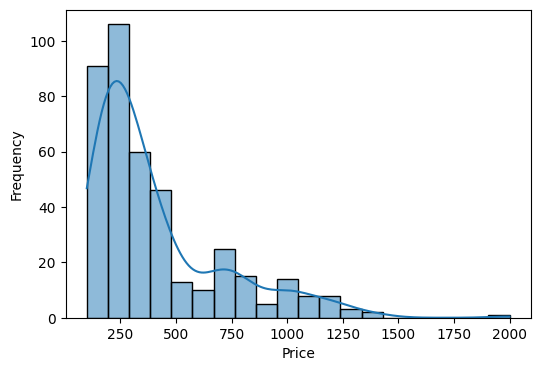

In [249]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Price"], kde=True, bins=20)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

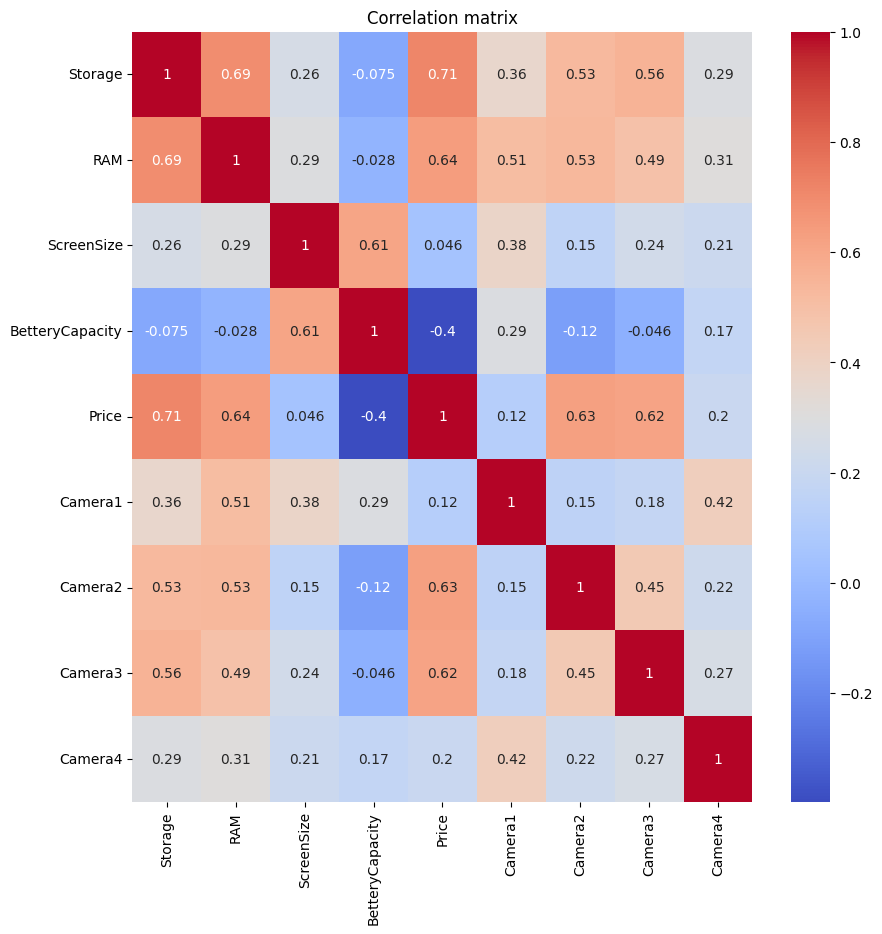

In [250]:
correlation_matrix = df.drop('Brand', axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

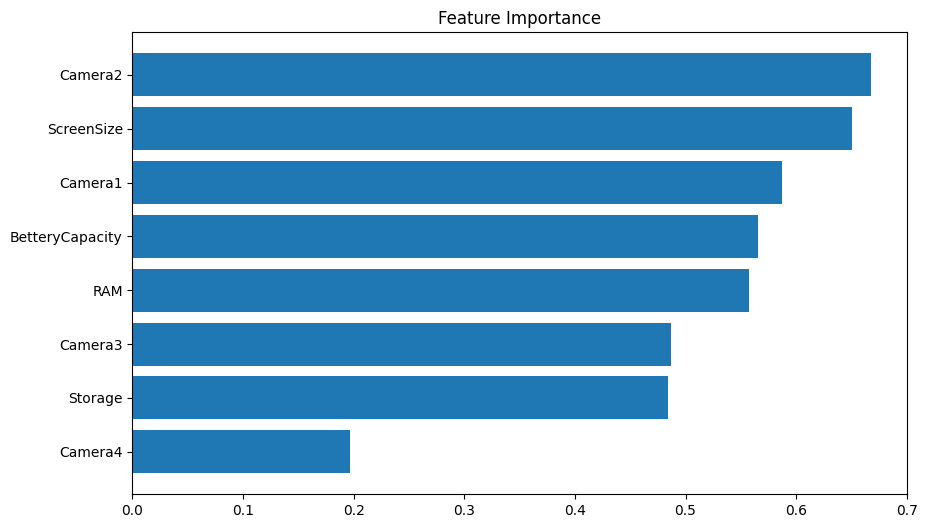

In [251]:
from sklearn.feature_selection import mutual_info_regression

x = df.drop(['Brand', 'Price'], axis=1)
y = df['Price']
# Вычисление важности признаков с использованием mutual information на ваших данных X_train и y_train 
mutual_info = mutual_info_regression(x, y, random_state=42)
# Создание DataFrame для отображения результатов
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': mutual_info})
# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.show()

In [252]:
df = pd.concat([df.drop('Brand', axis=1), pd.get_dummies(df['Brand'], dtype=int)], axis=1)
df = pd.get_dummies(df, columns=['Storage',], dtype=int)

In [253]:
df.head()

,RAM,ScreenSize,BetteryCapacity,Price,Camera1,Camera2,Camera3,Camera4,Apple,Asus,...,Realme,Samsung,Sony,Vivo,Xiaomi,Storage_32,Storage_64,Storage_128,Storage_256,Storage_512
0,6,6.10,3095,999,12.0,12.0,12.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,12,6.80,5000,1199,108.0,10.0,10.0,12.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,8,6.70,4500,899,48.0,50.0,8.0,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6,6.67,5020,279,64.0,8.0,5.0,2.0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,8,6.40,4614,799,50.0,12.2,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [254]:
x = df.drop('Price', axis=1)
y = df['Price']

# Model creation

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [256]:
x_train_scaled = x_train.loc[:, ['RAM', 'ScreenSize', 'BetteryCapacity', 'Camera1', 'Camera2', 'Camera3', 'Camera4']]
x_test_scaled = x_test.loc[:, ['RAM', 'ScreenSize', 'BetteryCapacity', 'Camera1', 'Camera2', 'Camera3', 'Camera4']]

In [257]:
# Compute the mean and standard deviation of the training set then transform it
scaler_linear = StandardScaler().fit(x_train_scaled)
x_train_scaled = scaler_linear.transform(x_train_scaled)
x_test_scaled = scaler_linear.transform(x_test_scaled)
x_train = np.concatenate((x_train_scaled, x_train.drop(['RAM', 'ScreenSize', 'BetteryCapacity', 'Camera1', 'Camera2', 'Camera3', 'Camera4'], axis=1).to_numpy()), axis=1)
x_test = np.concatenate((x_test_scaled, x_test.drop(['RAM', 'ScreenSize', 'BetteryCapacity', 'Camera1', 'Camera2', 'Camera3', 'Camera4'], axis=1).to_numpy()), axis=1)

In [258]:
result = pd.DataFrame({'Model':[], 'Accuracy':[], 'MSE':[], 'MAE':[], 'R2':[]})

In [259]:
def test_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Feed the scaled training set and get the predictions
    y_hat = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    test_mse = mean_squared_error(y_test, y_hat)
    test_mae = mean_absolute_error(y_test, y_hat)
    test_r2 = r2_score(y_test, y_hat)
    return accuracy, test_mse, test_mae, test_r2

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = []
linear = LinearRegression()
decision_tree = DecisionTreeRegressor()
rendom_forest = RandomForestRegressor()
svr = SVR()
k_neighbors = KNeighborsRegressor()
mlp = MLPRegressor()
gradient_boosting = GradientBoostingRegressor()
models.append(linear)
models.append(decision_tree)
models.append(rendom_forest)
models.append(svr)
models.append(k_neighbors)
models.append(mlp)
models.append(gradient_boosting)

for model in models:
    accuracy, test_mse, test_mae, test_r2 = test_model(model, x_train, y_train, x_test, y_test)
    result.loc[len(result.index)] = [str(model), accuracy, test_mse, test_mae, test_r2] 



c:\Users\Надя\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [261]:
result.sort_values(by=['MSE', 'MAE'])

,Model,Accuracy,MSE,MAE,R2
2,RandomForestRegressor(),0.833417,16291.803595,55.096626,0.833417
1,DecisionTreeRegressor(),0.833159,16317.064194,54.154472,0.833159
6,GradientBoostingRegressor(),0.830857,16542.170409,56.910443,0.830857
0,LinearRegression(),0.768072,22682.490166,81.482916,0.768072
4,KNeighborsRegressor(),0.692700,30053.914634,78.036585,0.692700
3,SVR(),0.028828,94980.508248,171.403634,0.028828
5,MLPRegressor(),-0.756080,171744.437994,303.271224,-0.756080


In [262]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

In [263]:
import random 
j = random.randint(0, len(y_test.to_numpy()))
print(f"\nReal price = {y_test.to_numpy()[j]}")
print(f"Predicted price = {y_hat[j]}")


Real price = 499
Predicted price = 499.0


In [264]:
import torch
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm

In [265]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [266]:
x_train = torch.tensor(x_train).float().to(device)
x_test = torch.tensor(x_test).float().to(device)
y_train = torch.tensor(y_train.to_numpy()).float().to(device)
y_test = torch.tensor(y_test.to_numpy()).float().to(device)

In [267]:
class NN(nn.Module):
    def __init__(self, input):
        super(NN, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input, 64),
                                 nn.ReLU(),
                                 nn.Linear(64, 16),
                                 nn.ReLU(),
                                 nn.Linear(16, 1))

    def forward(self, x):
        x = self.fc1(x)
        return x

In [268]:
model_nn = NN(len(x_train[0]))
model_nn.to(device)

NN(
  (fc1): Sequential(
    (0): Linear(in_features=28, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [269]:
optimizer = Adam(params=model_nn.parameters(), lr=1e-3)
loss_func = nn.MSELoss()

In [270]:
num_iter = 400
losses = []
losses_val = []
train_loop = tqdm(range(num_iter))
train_loop.set_description_str("Model training")
for i in train_loop:
    model_nn.train()
    outputs = model_nn(x_train)
    loss = loss_func(outputs, y_train)
    losses.append(loss.item())
    train_loop.set_postfix_str(f"Current error = {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    model_nn.eval()
    val_out = model_nn(x_test)
    val_loss = loss_func(val_out, y_test)
    losses_val.append(val_loss.item())

Model training:   0%|          | 0/400 [00:00<?, ?it/s]c:\Users\Надя\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([325])) that is different to the input size (torch.Size([325, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Model training:   0%|          | 0/400 [00:00<?, ?it/s, Current error = 261907.390625]c:\Users\Надя\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([82])) that is different to the input size (torch.Size([82, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Model training: 100%|██████████| 400/400 [00:01<00:00, 201.24it/s, Current error = 90383.171875]  


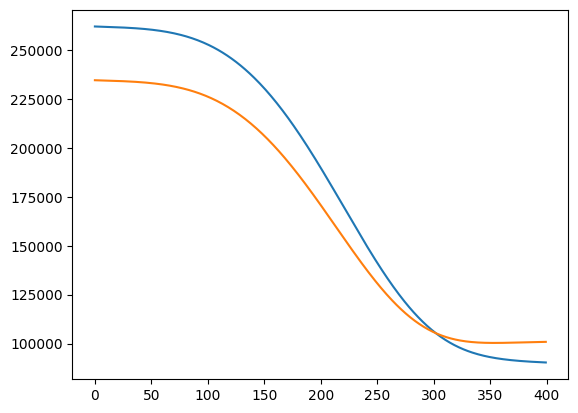

In [271]:
plt.plot(losses)
plt.plot(losses_val)

In [272]:
import random 
j = random.randint(0, len(y_test))

print(f"\nReal price = {y_test[j].item()}")
print(f"Predicted price = {model_nn(x_test[j]).item()}")


Real price = 299.0
Predicted price = 437.87451171875


In [273]:
results = model_nn(x_test).cpu().detach().numpy()
y_real = y_test.cpu().detach().numpy()
mse = mean_squared_error(y_real, results)
mae = mean_absolute_error(y_real, results)
r2 = r2_score(y_real, results)

print(f"mse =\t{mse}\nmae =\t{mae}\nr2 =\t{r2}")

mse =	112166.7890625
mae =	239.7161102294922
r2 =	-0.14690118241680183
